In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import scipy.stats as stats
import statsmodels as sm
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv(
    "/Users/hyunahlustig/Desktop/data science projects/heart_disease/Heart.csv"
)

<IPython.core.display.Javascript object>

In [7]:
df.columns = [
    "age",
    "sex",
    "chestpain_type",
    "resting_bp",
    "cholesterol",
    "bloodsugar",
    "resting_ecg",
    "max_hr",
    "ex_angina",
    "oldpeak",
    "ex_slope",
    "ca",
    "thal",
    "target",
]

<IPython.core.display.Javascript object>

In [8]:
df.isna().mean()

age               0.0
sex               0.0
chestpain_type    0.0
resting_bp        0.0
cholesterol       0.0
bloodsugar        0.0
resting_ecg       0.0
max_hr            0.0
ex_angina         0.0
oldpeak           0.0
ex_slope          0.0
ca                0.0
thal              0.0
target            0.0
dtype: float64

<IPython.core.display.Javascript object>

In [9]:
display(df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   chestpain_type  303 non-null    int64  
 3   resting_bp      303 non-null    int64  
 4   cholesterol     303 non-null    int64  
 5   bloodsugar      303 non-null    int64  
 6   resting_ecg     303 non-null    int64  
 7   max_hr          303 non-null    int64  
 8   ex_angina       303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  ex_slope        303 non-null    int64  
 11  ca              303 non-null    int64  
 12  thal            303 non-null    int64  
 13  target          303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

,age,sex,chestpain_type,resting_bp,cholesterol,bloodsugar,resting_ecg,max_hr,ex_angina,oldpeak,ex_slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<IPython.core.display.Javascript object>

## Part A) Exploratory Data Analysis:

#### How many are suffering from heart disease? Plot the stats and include conclusion statement at the end


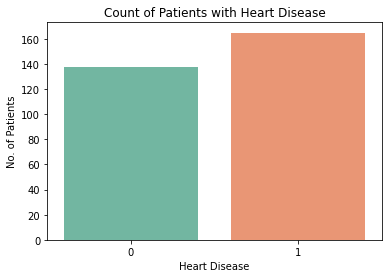

<IPython.core.display.Javascript object>

In [10]:
sns.countplot(data=df, x="target", palette="Set2")
plt.xlabel("Heart Disease")
plt.ylabel("No. of Patients")
plt.title("Count of Patients with Heart Disease")
plt.show()

In [11]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<IPython.core.display.Javascript object>

With a target value of 1, meaning positive for heart disease, there are 165 patients with heart disease and 138 without. 

#### How many males and females have heart disease? Use only one plot to find the gender most impacted by heart disease.

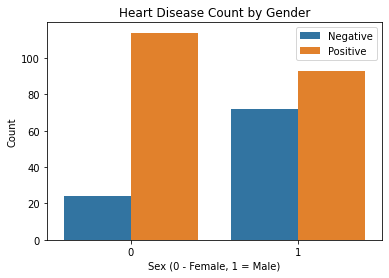

<IPython.core.display.Javascript object>

In [12]:
sns.countplot(data=df, x="target", hue="sex")
plt.xlabel("Sex (0 - Female, 1 = Male)")
plt.ylabel("Count")
plt.title("Heart Disease Count by Gender")
plt.legend(["Negative", "Positive"])
plt.show()

#### Create a visual representation of the frequency distribution of the thalach variable and find the heart rate and heart disease relation? Run various statistical tests to provide a conclusion.

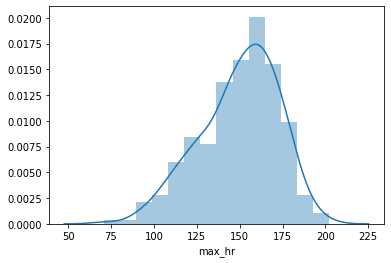

<IPython.core.display.Javascript object>

In [13]:
sns.distplot(df["max_hr"])
plt.show()

* $H_o:$ Data IS Normal
* $H_a:$Data IS NOT Normal

In [14]:
t, p = stats.shapiro(df["max_hr"])

<IPython.core.display.Javascript object>

In [15]:
print(
    "The p-value for the thalach variable is: ",
    np.round(p, decimals=4),
    ", we can therefore reject the null hypothesis that the data and accept the alternate hypothesis that the data is NOT normal. ",
)

The p-value for the thalach variable is:  0.0001 , we can therefore reject the null hypothesis that the data and accept the alternate hypothesis that the data is NOT normal. 


<IPython.core.display.Javascript object>

In [16]:
print(
    "The distribution is left skewed and has a kurtosis of :",
    df.max_hr.kurtosis(),
    ". Which means that the distribution has lighter tails and a flatter peak.",
)

The distribution is left skewed and has a kurtosis of : -0.06196993057611566 . Which means that the distribution has lighter tails and a flatter peak.


<IPython.core.display.Javascript object>

In [20]:
print(
    "The correlation between max heart rate and heart disease is ",
    np.round(df["max_hr"].corr(other=df["target"]), decimals=4),
)

The correlation between max heart rate and heart disease is  0.4217


<IPython.core.display.Javascript object>

In [21]:
print(
    "Since the correlation between max heart rate and heart disease is positively correlated, chances of heart disease increase with increase in maximum heart rate."
)

Since the correlation between max heart rate and heart disease is positively correlated, chances of heart disease increase with increase in maximum heart rate.


<IPython.core.display.Javascript object>

#### Find correlation matrix for all the variables with target. Find Mean, Min & Max of age and plot its distribution.

#### Age and its relation to heart disease. Are young people more prone to heart disease?

#### Plot chest pain type pie chart.

#### What is the max heart rate achieved in non-heart disease patients?

## Part B) Machine Learning Model:

#### Test different Machine models to test which model has higher accuracy to choose from?

#### After choosing the best model, try to predict based on user based inputs and let the best model predict whether the user can have heart disease or not.

## Part C) Deployment of Model
User form using Jupyter Notebook Widgets

Create a user-based form within the Jupyter notebook (documentation) to receive input from the user. Form should include all parameters needed to predict heart disease probability.

Code form to calculate results when user submits form. Test to see if right answer is provided.